**DEFINING THE LOSS AND GRADIENT**

In [ ]:
import numpy as np
import math

In [ ]:
def loss_fn(w):
  x,y=w
  return x**2+10*(y**2)
def grad(w):
  x,y=w
  return np.array([(2*x),20*(y)])

In [ ]:
def optimizer(opti,steps=25):
  losses=[]
  w=np.array([1.5,1.5])

  for i in range(steps):
    path.append(w.copy())
    losses.append(loss_fn(w))
    ga=grad(w)
    w=opti.step(w,ga)

    print(f"step {i} | w= {w} | loss={losses[-1] } ")
  return np.array(path),np.array(losses)

In [ ]:
class grad_descent:
  def __init__(self,lr):
    self.lr=lr

  def step(self,w,grad):
    return w-(self.lr*grad)

In [ ]:
# vt = v(t-1) * beta + new_grad
class momentum:
  def __init__(self,lr,beta):
    self.lr=lr
    self.beta=beta
    self.v=None

  def step(self,w,grad):
    if self.v is None:
      self.v=np.zeros_like(w)
    self.v= (self.beta*self.v) +(1-self.beta)*grad
    return w-self.lr*(self.v)


In [ ]:
# w= w- lr*grad/(sqrt(eps+s**2))
class rmsprop:
  def __init__(self,lr,beta,eps):
    self.lr=lr
    self.beta=beta
    self.eps=eps
    self.v=None

  def step(self,w,grad):
    if self.v is None:
      self.v=np.zeros_like(w)
    self.v=self.beta*self.v+(1-self.beta)*(grad**2)
    return w-self.lr*grad/(np.sqrt(self.v)+self.eps)

In [ ]:

# momentum + rmsprop
class adam:
  def __init__(self,lr,beta1,beta2,eps):
    self.lr=lr
    self.beta1=beta1
    self.beta2=beta2
    self.eps=eps
    self.v1=None
    self.v2=None
    self.t=0

  def step(self,w,grad):
    if self.v1 is None:
      self.v1=np.zeros_like(w)
      self.v2=np.zeros_like(w)

    self.t+=1
    self.v1=self.v1*(self.beta1)+(1-self.beta1)*(grad**2)
    self.v2=(self.beta2)*(self.v2) + (1-self.beta2)*grad

    avg_v1=self.v1/(1-(self.beta1**self.t))
    avg_v2=self.v2/(1-(self.beta2**self.t))

    return w-self.lr*(avg_v2)/(np.sqrt(avg_v1)+self.eps)

In [ ]:
g=grad_descent(lr=0.1)
a=adam(0.1,0.2,0.2,0.00000001)
m=momentum(lr=0.1,beta=0.2)
rm=rmsprop(lr=0.1,beta=0.2,eps=0.00000001)

In [ ]:
path,losses=optimizer(g,30)
path2,losses2=optimizer(m,30)
path3,losses3=optimizer(rm,30)
path4,losses4=optimizer(a,30)

step 0 | w= [ 1.2 -1.5] | loss=24.75 
step 1 | w= [0.96 1.5 ] | loss=23.94 
step 2 | w= [ 0.768 -1.5  ] | loss=23.4216 
step 3 | w= [0.6144 1.5   ] | loss=23.089824 
step 4 | w= [ 0.49152 -1.5    ] | loss=22.87748736 
step 5 | w= [0.393216 1.5     ] | loss=22.7415919104 
step 6 | w= [ 0.3145728 -1.5      ] | loss=22.654618822656 
step 7 | w= [0.25165824 1.5       ] | loss=22.59895604649984 
step 8 | w= [ 0.20132659 -1.5       ] | loss=22.563331869759896 
step 9 | w= [0.16106127 1.5       ] | loss=22.540532396646334 
step 10 | w= [ 0.12884902 -1.5       ] | loss=22.525940733853655 
step 11 | w= [0.10307922 1.5       ] | loss=22.516602069666337 
step 12 | w= [ 0.08246337 -1.5       ] | loss=22.510625324586456 
step 13 | w= [0.0659707 1.5      ] | loss=22.50680020773533 
step 14 | w= [ 0.05277656 -1.5       ] | loss=22.50435213295061 
step 15 | w= [0.04222125 1.5       ] | loss=22.502785365088393 
step 16 | w= [ 0.033777 -1.5     ] | loss=22.50178263365657 
step 17 | w= [0.0270216 1.5    

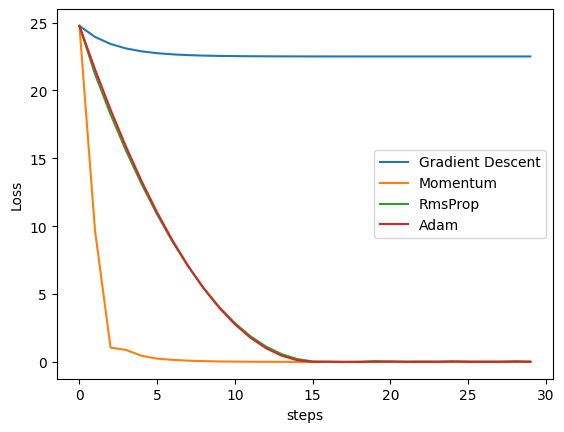

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(losses)),losses,label="Gradient Descent")
plt.plot(range(len(losses2)),losses2,label="Momentum")
plt.plot(range(len(losses3)),losses3,label="RmsProp")
plt.plot(range(len(losses4)),losses4,label="Adam")

plt.xlabel("steps")
plt.ylabel("Loss")
plt.legend()
plt.show()